## Read IBTrACS data file for TC tracks and plot the locations of all TC genesis over range of months

In [2]:
from matplotlib.dates import num2date,date2num
import xarray as xr
import numpy as np
import datetime as dt
import cftime as cf
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from   calendar import monthrange
import pandas as pd

## some basic settings
## where is the ibtracs file?

In [3]:

dataDir  = "~/data100/data/ibtracs/"
filename = "IBTrACS.since1980.v04r00.nc"

file = dataDir+filename

try:
    ds = xr.open_dataset(file)
    print ("Ibtracs file found and opened")
except:
    print ("file not found. quitting code")
    
    
# read the first record for each TC
time  = ds.time[:,0]
basin = ds.basin[:,0]

Ibtracs file found and opened


# define the function for the plot

In [16]:
# Plot settings
def plot_locations(minlon,laxlon,minlat,maxlat,lon,lat):

    data_crs = ccrs.PlateCarree()
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([minlon,maxlon,minlat,maxlat], crs=ccrs.PlateCarree())
    #ax.set_global()

    ax.coastlines(linewidths=0.5, color='grey')
    ax.add_feature(cfeature.LAND,color='lightgrey')
    #ax.spines['geo'].set_edgecolor('black')

# marker size is controlled by s
    ax.scatter(lon,lat,s=5,transform=data_crs)
    return ax
def plotTitle(ax,titleString):
        ax.set_title(titleString, fontsize=16)


# first plot: 
## plot all TCs over the globe for a selected range of years


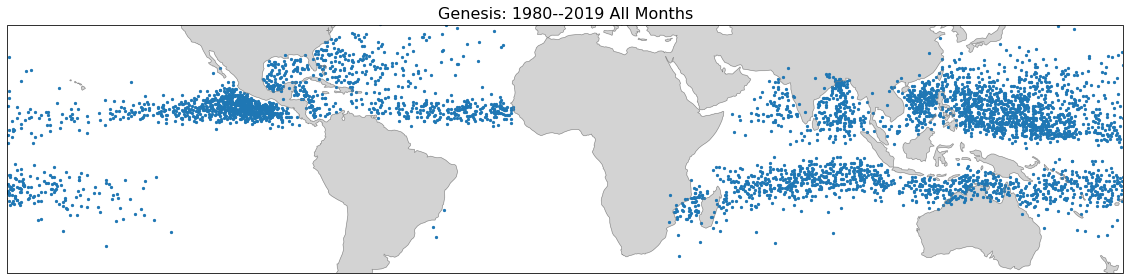

In [35]:

# plot extent is global for this one

minlon = -180.
maxlon =  180.
minlat =  -40.
maxlat =   40.

yearStart = 1980
yearEnd   = 2019

tsub = time.where((time["time.year"] >= yearStart)&(time["time.year"] <= yearEnd) , drop=True)


# plot the locations

ax=plot_locations(minlon,maxlon,minlat,maxlat,tsub.lon,tsub.lat)
titleString = "Genesis: " + str(yearStart) + "--" + str(yearEnd) + " All Months" 
plotTitle(ax,titleString)

# Second plot: 
## plot all TCs over the globe for a selected range of years And Months


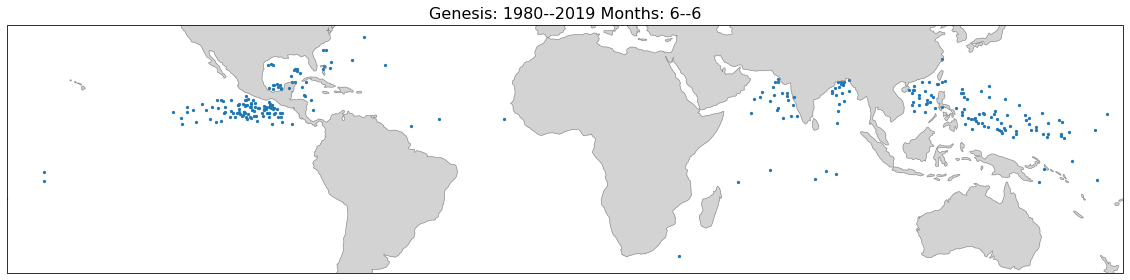

In [43]:
#--------------------------------------------------
minlon = -180.
maxlon =  180.
minlat =  -40.
maxlat =   40.

yearStart = 1980
yearEnd   = 2019

monthStart = 6
monthEnd   = 6
#--------------------------------------------------

tsub = time.where((time["time.year"] >= yearStart)&(time["time.year"] <= yearEnd) , drop=True)
# further subset for the month range
tsub = tsub.where((tsub["time.month"] >= monthStart)&(tsub["time.month"] <= monthEnd) , drop=True)

# plot the locations
ax=plot_locations(minlon,maxlon,minlat,maxlat,tsub.lon,tsub.lat)
titleString = "Genesis: " + str(yearStart) + "--" + str(yearEnd) + " Months: " + str(monthStart) +"--"+ str(monthEnd)
plotTitle(ax,titleString)


# Third plot: 
## plot all TCs over the globe for a selected range of years And Months And Selected Basin


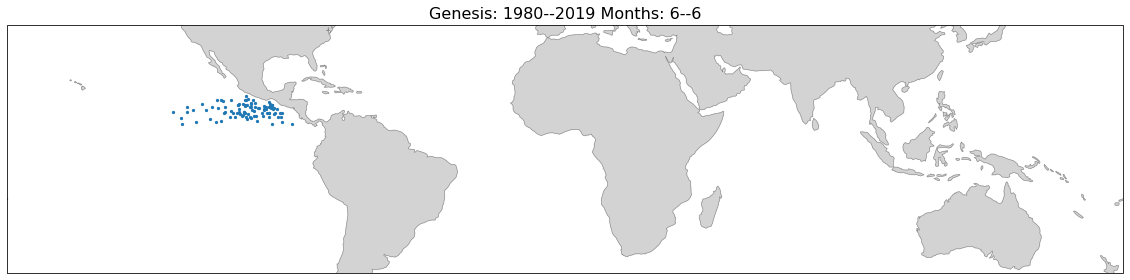

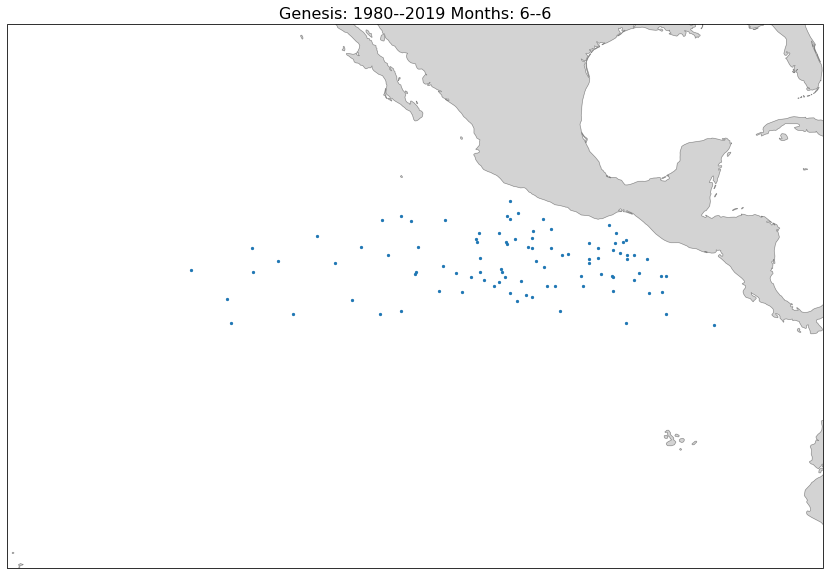

In [42]:

# read the basin for first record for each TC
basin = ds.basin[:,0]


#--------------------------------------------------

minlon = -180.
maxlon =  180.
minlat =  -40.
maxlat =   40.


yearStart = 1980
yearEnd   = 2019

monthStart = 6
monthEnd   = 6
#--------------------------------------------------


#basin wanted
basinWanted = 'EP'


#encode it to utf-8
basinWant=basinWanted.encode("utf-8")

tsub = time.where( basin==basinWant, drop=True)


tsub = tsub.where((tsub["time.year"] >= yearStart)&(tsub["time.year"] <= yearEnd) , drop=True)
# further subset for the month range
tsub = tsub.where((tsub["time.month"] >= monthStart)&(tsub["time.month"] <= monthEnd) , drop=True)
# plot the locations


ax=plot_locations(minlon,maxlon,minlat,maxlat,tsub.lon,tsub.lat)
titleString = "Genesis: " + str(yearStart) + "--" + str(yearEnd) + " Months: " + str(monthStart) +"--"+ str(monthEnd)
plotTitle(ax,titleString)


# zoom in the area
minlon = -140.
maxlon =  -80.
minlat =  -10.
maxlat =   30.

ax=plot_locations(minlon,maxlon,minlat,maxlat,tsub.lon,tsub.lat)
titleString = "Genesis: " + str(yearStart) + "--" + str(yearEnd) + " Months: " + str(monthStart) +"--"+ str(monthEnd)
plotTitle(ax,titleString)

#plt.savefig("figure.png") # save as png
